In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import invgamma

In [25]:
Nspin = 500;
Niter = 40000;
dt = 0.05;
beta = 0.1;
sigma = 1/2;
#vals = invgamma.pdf([0.001, 0.5, 100], sigma)
#print(vals)


In [26]:
scelte = [1,-1]
X = np.random.choice(scelte, Nspin) # gli spins
#X =np.zeros(Nspin) + 1
Y = np.zeros(Nspin) # i clocks
MediaEmperica = np.zeros(Niter) # le medie degli spin
SommaY = np.zeros(Niter) #le medie dei clocks
S = np.zeros((Niter,2)) # entrambi in una lista



In [27]:
for i in range(0,Niter):
    
    MediaEmperica[i] = np.mean(X)
    SommaY[i] = np.mean(Y)
    S[i,:] = [MediaEmperica[i], SommaY[i]]
    Y = Y + dt
    
    for j in range(0,Nspin):
        z = np.random.random_sample(1)
        if z < invgamma.pdf(np.exp(-beta*X[j]*MediaEmperica[i])*Y[j],sigma)*np.exp(-beta*X[j]*MediaEmperica[i])*dt:
            Y[j] = 0
            X[j] = -X[j]
    

  

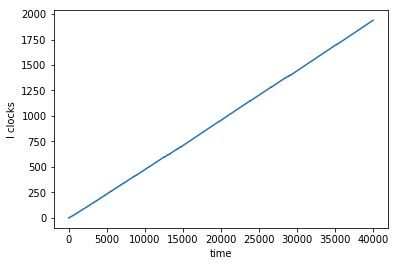

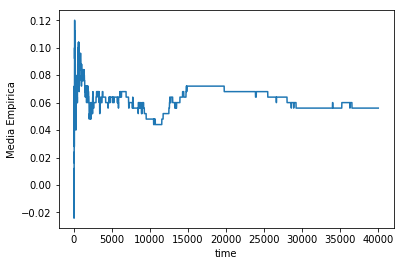

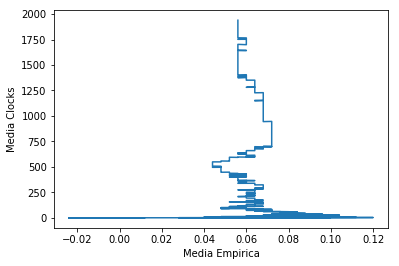

In [28]:
plt.plot(SommaY)
plt.xlabel('time')
plt.ylabel('I clocks')
plt.show() 

plt.plot(MediaEmperica)
plt.xlabel('time')
plt.ylabel('Media Empirica')
plt.show() 

#plt.rcParams['agg.path.chunksize'] = 50000
plt.plot(S[:,0],S[:,1])
plt.xlabel('Media Empirica')
plt.ylabel('Media Clocks')
plt.show() 